# automate pitch estimation

In [34]:
import re
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
inputname='pitch'
onlyfiles = [ f for f in listdir(inputname) if f.endswith(".pitch")]
#f=open('CHJ000014','r').read()
#fl=f.split('\n')

In [31]:
num_file=len(onlyfiles)
num_plot=num_file
#plot 4 per row
while num_plot%4!=0:
    num_plot+=1
#plot a by b matrix
a=4
b=num_plot/a

In [35]:
def gen_xy(pitch_file):
    """from a pitch file, return a list of times, and a list of pitch values"""
    f=open(pitch_file,'r').read()
    fl=f.split('\n')
    times=[]
    pitches=[]
    for line in fl:
        if re.search('number =',line):
            times.append(line.split(' = ')[1].replace(' ',''))
        if re.search('value =',line):
            pitches.append(line.split(' = ')[1].replace(' ',''))
    assert(len(times)==len(pitches))
    return times,pitches

In [37]:
p,q=gen_xy('pitch/'+onlyfiles[0])

In [40]:
print p[:10]
print q[:10]

['0.4820000000000001', '0.4821000000000001', '0.4822000000000001', '0.4823000000000001', '0.4824000000000001', '0.4825000000000001', '0.4826000000000001', '0.4827000000000001', '0.4828000000000001', '0.4829000000000001']
['147.6945665023253', '147.68998717957925', '147.67625006322504', '147.65335770864914', '147.62131437394936', '147.58012601861378', '147.5389491553898', '147.50693064932662', '147.48406454216732', '147.47034657933386']


In [13]:
times=[]
pitches=[]
for line in fl:
    if re.search('number =',line):
        times.append(line.split(' = ')[1].replace(' ',''))
    if re.search('value =',line):
        pitches.append(line.split(' = ')[1].replace(' ',''))

In [14]:
len(times)

4951

In [15]:
len(pitches)

4951

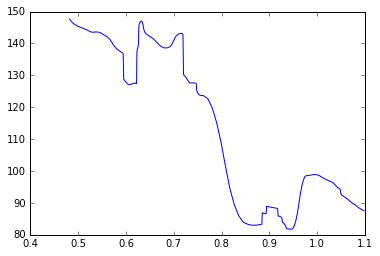

In [17]:
plt.plot(times,pitches)

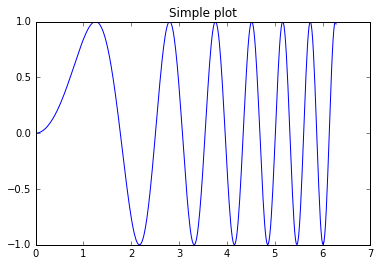

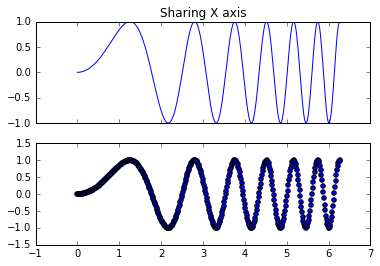

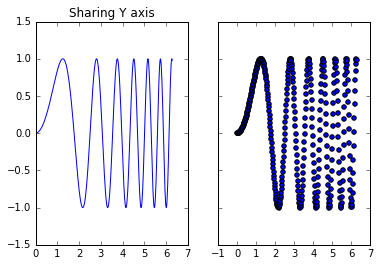

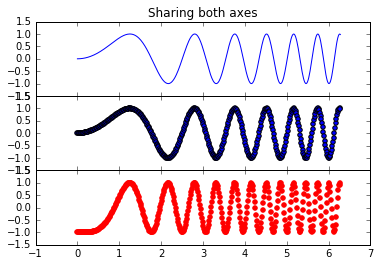

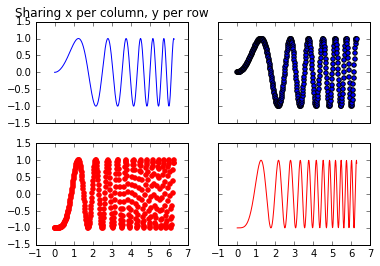

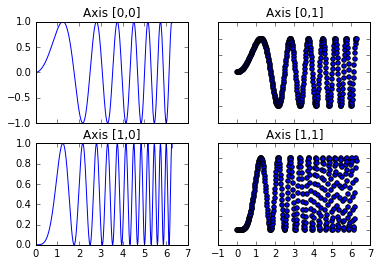

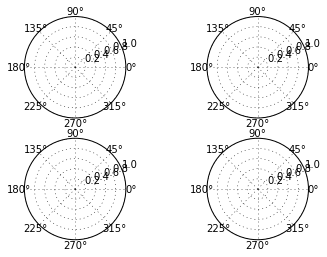

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
plt.subplots(2, 2, subplot_kw=dict(projection='polar'))

plt.show()

# code writeup

In [ ]:
import re
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def plot_matrix(xs,ys,i,j):
    f, axarr = plt.subplots(i,j)
    axarr[i, j].plot(xs, ys)
    
    
    
def gen_xy(pitch_file):
    """from a pitch file, return a list of times, and a list of pitch values"""
    f=open(pitch_file,'r').read()
    fl=f.split('\n')
    times=[]
    pitches=[]
    for line in fl:
        if re.search('number =',line):
            times.append(line.split(' = ')[1].replace(' ',''))
        if re.search('value =',line):
            pitches.append(line.split(' = ')[1].replace(' ',''))
    assert(len(times)==len(pitches))
    return times,pitches

In [69]:
inputname='pitch'
onlyfiles = [ f for f in listdir(inputname) if f.endswith(".pitch")]
print onlyfiles

['pitcCHJ000014.pitch', 'pitcCHJ000018.pitch', 'pitcCHJ000019.pitch', 'pitcCHJ000025.pitch', 'pitcCHJ000032.pitch']


In [68]:
ls

pitch/                pitch.pdf             speech-scripts/
pitch analysis.ipynb  pitchest.praat        test/


In [63]:
num_file=len(onlyfiles)
num_plot=num_file
num_per_row=2
#plot num_per_row per row
while num_plot%num_per_row!=0:
    num_plot+=1
#plot a by b matrix
b=2
a=num_plot/b


f, axarr = plt.subplots(a,b)
i=j=0
for file in onlyfiles:
    print i,j
    xs,ys=gen_xy(inputname+'/'+file)
    axarr[i, j].plot(xs, ys)
    if j==b-1:
        i+=1
        j=0
    else:
        j+=1

f.savefig('pitch.pdf')

IndexError: index out of range

# pitch trimming algo

### here we look at  a speific case that shows the problem with interpolation with original time, XIY000084

### try to get boxplot info (like in R) from the pitch track data and trim them

In [ ]:
#what's in the boxplot
median = np.median(data)
upper_quartile = np.percentile(data, 75)
lower_quartile = np.percentile(data, 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
lower_whisker = data[data>=lower_quartile-1.5*iqr].min()

In [59]:
f=open(pfile,'r').read().split('\n')

In [60]:
#doing trimming
time=[]
pitch=[]
for i in range(1,len(f)):
    line=f[i]
    if line!="":
        split=line.split('\t')
        #print split
        time.append(float(split[0]))
        pitch.append(float(split[1]))

    


[array([ 101.37869087,   73.45460921]), array([ 159.76485901,  215.84909019])]


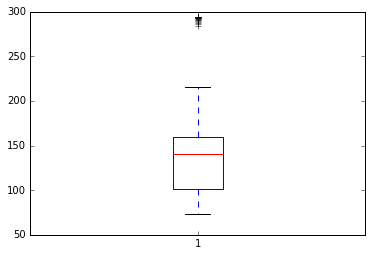

In [62]:
B=plt.boxplot(pitch)
plt.savefig('box.pdf')
ydata=[item.get_ydata() for item in B['whiskers']]
print ydata
upper=ydata[1][1] #this is the upper whisker

### seems like what we need to try is to trim everything above ydata[1][1]

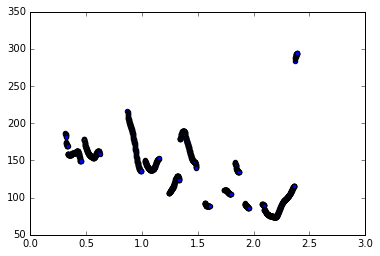

In [63]:
plt.scatter(time,pitch)

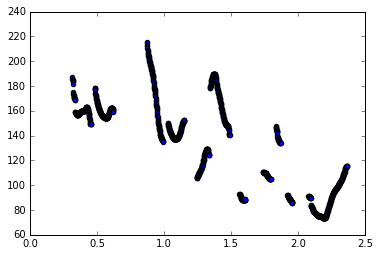

In [65]:
#however, notice that in this case there a lot of values (spurious) in the boxplot that is caused by interpolation.
#first, remove the spurious points
#then, interpolate
new_pitch=[]
new_time=[]
for i in range(len(pitch)):
    if pitch[i]<=upper:
        new_pitch.append(pitch[i])
        new_time.append(time[i])
    
        
plt.scatter(new_time,new_pitch)

In [67]:
print len(new_time),len(time)
print new_time[-5:],time[-5:]
#in this case of XIY000084, the trimmed high value are in the very end,and after trimming the 
#time ends earlier at 2.3645s, while the original, ends at 2.3905.at this point, the pitch 
#track looks good, but if we interpolate with the original time which will extend for 0.03s, 
#then the result of the interpolation is bad, causing a spurious dropping tail in the end. 
#in this case, therefore, we just want to fit the interpolation time to the end point of the 
#new_time, instead of the original time. 

1239 1258
[2.3605, 2.3615, 2.3625, 2.3635, 2.3645] [2.3865, 2.3875, 2.3885, 2.3895, 2.3905]


In [72]:
adjusted_time=[i for i in time if i<=new_time[-1]]
print adjusted_time[-1]
print len(adjusted_time)
#note that this adjusted_time is exactly the same as the new_time in this case, because 
#in this file all the spurious pitch values (trimmed off) are at the end, after the end of 
#new_time, in time variable (original time).
#therefore, if you do interpolation at this point on the adjusted_time, the resulting pitch 
#track is no different than new_pitch. (which is what we want 'cause the new_pitch looks good.)

2.3645
1239


In [10]:
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
#x=new_time
#y=new_pitch
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

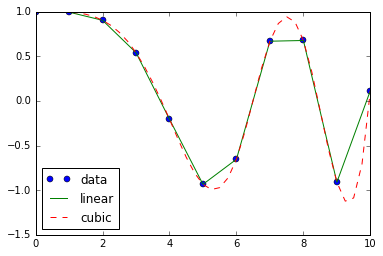

In [11]:
#scipy example for interpolation
>>> xnew = np.linspace(0, 10, num=41, endpoint=True)
>>> import matplotlib.pyplot as plt
>>> plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
>>> plt.legend(['data', 'linear', 'cubic'], loc='best')
>>> plt.show()

In [12]:
len(y)

11

In [73]:
fp=interp1d(new_time,new_pitch,bounds_error=False, fill_value=-0.001)

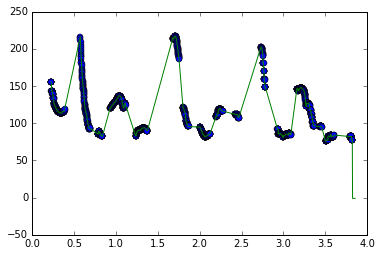

In [66]:
plt.plot(new_time, new_pitch, 'o', time, fp(time), '-')

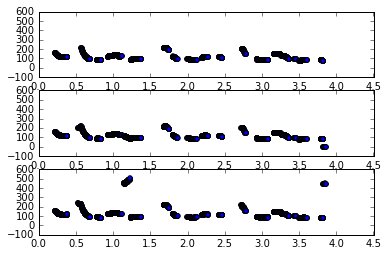

In [74]:
f, (ax1, ax2,ax3) = plt.subplots(3, 1,sharey=True)
ax1.scatter(new_time, new_pitch)

ax2.scatter(time, fp(time))
ax3.scatter(time,pitch)
#f.savefig('pitch-001-75-interp.pdf')

In [70]:
len(new_pitch)

1630

In [71]:
len(fp(time))

1797

In [51]:
#check if the time values are monotonically increasing
for i in range(1,len(f)-2):
    line=f[i]
    if line!="":
        time=line.split('\t')[0]
        next_line=f[i+1]
        time_next=next_line.split('\t')[0]
        if time>time_next:
            print time,time_next
            
#more check
for i in range(0,len(new_time)-1):
    if new_time[i]>new_time[i+1]:
        print i,new_time[i],new_time[i+1]
        
        
        
#understanding what is in this boxplot
for k,v in B.iteritems():
    print k,v

In [37]:
dir='pitch'
onlyfiles = [ f for f in listdir(dir) if f.endswith(".pitch")]
print onlyfiles

['pitcCHX000040.pitch', 'pitcCHX000272.pitch', 'pitcSHH000417.pitch', 'pitcXIY000084.pitch', 'pitcXIY000205.pitch']


### get the pitch data without interpolation(from praat), then interpolate in python after trimming

In [2]:
#to interpolate, we just need to generate the time-stamps from the first point to the last point


In [4]:
ls pitch

pitcCHX000040.pitch       pitcCHX000272.tabbox.pdf  pitcXIY000084.tab
pitcCHX000040.tab         pitcSHH000417.pitch       pitcXIY000084.tabbox.pdf
pitcCHX000040.tabbox.pdf  pitcSHH000417.tab         pitcXIY000205.pitch
pitcCHX000272.pitch       pitcSHH000417.tabbox.pdf  pitcXIY000205.tab
pitcCHX000272.tab         pitcXIY000084.pitch       pitcXIY000205.tabbox.pdf


In [42]:
pfile='pitch/pitcXIY000084.tab'

In [38]:
f=open(pfile,'r').read().split('\n')

In [39]:
begin=f[1].split('\t')[0]
end=f[-2].split('\t')[0]
print begin,end

0.31349999999999983 2.3905


In [40]:
import numpy as np
a=np.arange(float(begin),float(end),0.001)

In [76]:
def trim(inputfile):
    """input should be a pitch.tab file"""
    
    #filename='pitcCHJ000032.pitch_simple.tab'
    f=open(inputfile,'r').read().split('\n')

    time=[]
    pitch=[]
    for i in range(1,len(f)):
        line=f[i]
        if line!="":
            split=line.split('\t')
            #print split
            time.append(float(split[0]))
            pitch.append(float(split[1]))


    B=plt.boxplot(pitch)
    plt.savefig(inputfile+'box.pdf')
    plt.close() 
    ydata=[item.get_ydata() for item in B['whiskers']]
    upper=ydata[1][1] #this is the upper whisker

    new_pitch=[]
    new_time=[]
    for i in range(len(pitch)):
        if pitch[i]<=upper:
            new_pitch.append(pitch[i])
            new_time.append(time[i])
        
    adjusted_time=[i for i in time if i<=new_time[-1]]

    #plt.plot(new_time,new_pitch)
    fp=interp1d(new_time,new_pitch,bounds_error=False, fill_value=-0.001)
    return time,adjusted_time,pitch,fp(adjusted_time)

In [77]:
time,adjusted_time,pitch,new_pitch=trim(pfile)

In [78]:
print len(time),len(pitch),len(new_pitch)

1258 1258 1239


In [79]:
from scipy.interpolate import interp1d
fp=interp1d(adjusted_time,new_pitch,bounds_error=False, fill_value=-0.001)

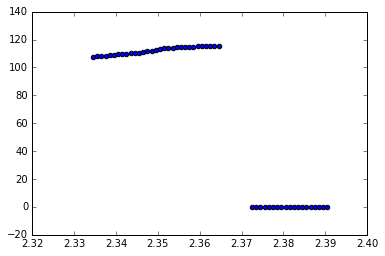

In [54]:
plt.scatter(time[-50:],new_pitch[-50:])

In [47]:
b=fp(a)

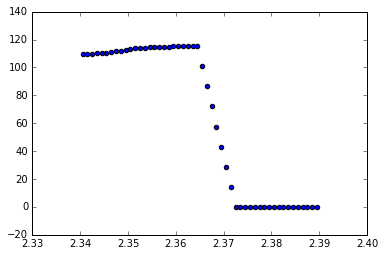

In [55]:
plt.scatter(a[-50:],b[-50:])

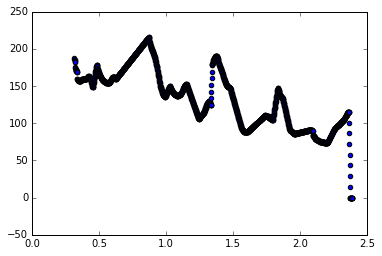

In [58]:
plt.scatter(a,b)
#plt.savefig('ahd.pdf')

# plotting spectrogram with pitch and annotation

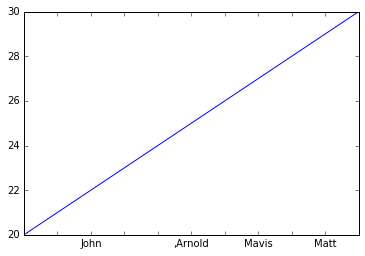

In [81]:
#put in xlabel annotations of segments: demo
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([20,21,22,23,24,25,26,27,28,29,30])
my_xticks = ["","",'John',"","",","'Arnold',"",'Mavis',"",'Matt']
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()

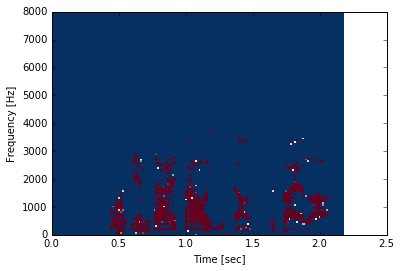

In [107]:
from pylab import *
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from scipy import signal

# read audio samples
fs=16000
input_data = read("output.wav")
f, t, Sxx = signal.spectrogram(input_data[1], input_data[0])
plt.pcolormesh(t, f, Sxx,vmin=9000., vmax=10000.,cmap='RdBu_r')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [191]:
from bisect import bisect_left
def find_lt(a, x):
    'Find rightmost value less than x'
    i = bisect_left(a, x)
    if i:
        return a[i-1]
    raise ValueError

In [205]:
#this means the insertion point in this sorted list is index 125.
print bisect_left(time, 0.5498)
print bisect_left(time,0.6008)

125
161


In [250]:

def get_annos(phons_file):
    g=open(phons_file,'r').read().split('\n')
    timestamps=[]
    for line in g:
        l=line.split()
        if line!='':
            timestamps.append(l)
    xt=[]
    labels=[]
    for l in timestamps:
        xt.append(l[1])
        labels.append(l[2])
    return xt,labels


def gen_annos(time,xt,labels):
    """xt is a set of end time stamps where labels are located """
    my_xticks = [""]*len(time)
    prev=0
    for k in range(len(xt)):
        t=float(xt[k])
        if t>=time[0]:
            #print "t=",t
            lt=bisect_left(time,t)-5
            #print "lt=",lt
            #print 'prev=',prev
            lta=(lt+prev)/2
            prev=lt

            #print 'lta=',lta

            my_xticks[lta]=labels[k]
            #print "label=",labels[k]
    return my_xticks



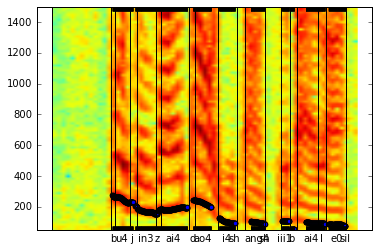

In [246]:
#input: a time and a pitch object (list), and the set of xticks
S, freqs, bins, im = plt.specgram(input_data[1], NFFT=1024, Fs=fs, noverlap=512)

#axes=plt.scatter(interp_time,interp_pitch)
maxp=np.max(pitch)
minp=np.min(pitch)
plt.xticks(time, my_xticks)
plt.scatter(time,pitch)
for l in timestamps:
    #print l
    plt.plot((l[0],l[0]),(50,1500),'k-')
plt.ylim([50,1500])
plt.savefig('spectro.pdf')
#my_xticks = [0*10]


In [208]:
print xt,labels

['0.4148', '0.4425', '0.5498', '0.6008', '0.7331', '0.7657', '0.9625', '1.0058', '1.1715', '1.3010', '1.3630', '1.5025', '1.6125', '1.6770', '1.7258', '1.8771', '1.9286', '2.0744', '2.186'] ['sil', 'b', 'u4', 'j', 'in3', 'z', 'ai4', 'd', 'ao4', 'i4', 'sh', 'ang4', 'sh', 'iii1', 'b', 'ai4', 'l', 'e0', 'sil']


In [245]:
my_xticks = [""]*len(time)
prev=0
for k in range(len(xt)):
    t=float(xt[k])
    if t>=time[0]:
        print "t=",t
        lt=bisect_left(time,t)-5
        print "lt=",lt
        print 'prev=',prev
        lta=(lt+prev)/2
        prev=lt
        
        print 'lta=',lta
        
        my_xticks[lta]=labels[k]
        print "label=",labels[k]
        
    

t= 0.4425
lt= 13
prev= 0
lta= 6
label= b
t= 0.5498
lt= 120
prev= 13
lta= 66
label= u4
t= 0.6008
lt= 156
prev= 120
lta= 138
label= j
t= 0.7331
lt= 289
prev= 156
lta= 222
label= in3
t= 0.7657
lt= 321
prev= 289
lta= 305
label= z
t= 0.9625
lt= 510
prev= 321
lta= 415
label= ai4
t= 1.0058
lt= 522
prev= 510
lta= 516
label= d
t= 1.1715
lt= 638
prev= 522
lta= 580
label= ao4
t= 1.301
lt= 752
prev= 638
lta= 695
label= i4
t= 1.363
lt= 752
prev= 752
lta= 752
label= sh
t= 1.5025
lt= 853
prev= 752
lta= 802
label= ang4
t= 1.6125
lt= 853
prev= 853
lta= 853
label= sh
t= 1.677
lt= 904
prev= 853
lta= 878
label= iii1
t= 1.7258
lt= 933
prev= 904
lta= 918
label= b
t= 1.8771
lt= 1024
prev= 933
lta= 978
label= ai4
t= 1.9286
lt= 1070
prev= 1024
lta= 1047
label= l
t= 2.0744
lt= 1191
prev= 1070
lta= 1130
label= e0
t= 2.186
lt= 1191
prev= 1191
lta= 1191
label= sil


In [123]:
def interpolate_pitch(begin,end,adjusted_time,pitch):
    interp_time=np.arange(float(begin),float(end),0.001)
    fp=interp1d(adjusted_time,pitch,bounds_error=False, fill_value=-0.001)
    interp_pitch=fp(interp_time)
    return interp_time,interp_pitch


In [126]:
pfile='pitch/pitcCHJ000019.tab'
time,adjusted_time,pitch,new_pitch=trim(pfile)
begin,end=adjusted_time[0],adjusted_time[-1]
interp_time,interp_pitch=interpolate_pitch(begin,end,adjusted_time,new_pitch)


## new strategy: first get un-interpolated pitch track, then we eliminate values from unvoiced segments, then do interpolation

also need to think about keeping time info which is consistent with the textgrid: in the end, the adjusted_time doesnt matter much, because our goal is to get the voiced segment pitch as truthfully as possible, then we interpolate the unvoiced segs, and the adjust_time would be irrelevant to this. (even if adjusted_time is not present, but if it is a voiced seg, we still need that. )

In [128]:
ls

CHJ000019.flac*        output.wav             run-get-pitch.sh*
MacAir-orig-data/      pitch/                 simple_pitch.py
ahd.pdf                pitch analysis.ipynb   speech-scripts/
batch_interp.py        pitch-sep11/           test/
batch_trim.py          pitch_plot.py          test-mid/
batch_trim.pyc         pitch_plot.pyc         test-small/
box.pdf                pitchest.praat         trim-test.pdf
diss-proposal (1).pdf* pitchtest/             trim_pitch.py
gen_textgd.py*         plots/                 trim_pitch.pyc
get_pitch.praat        prob_cases/
interpolate.py         results-sep11/


In [129]:
g=open("CHJ000019.phons",'r').read().split('\n')

In [134]:
g=open("CHJ000019.phons",'r').read().split('\n')
timestamps=[]
for line in g:
    l=line.split()
    if line!='':
        timestamps.append(l)
    

In [135]:
timestamps

[['0', '0.4148', 'sil'],
 ['0.4148', '0.4425', 'b'],
 ['0.4425', '0.5498', 'u4'],
 ['0.5498', '0.6008', 'j'],
 ['0.6008', '0.7331', 'in3'],
 ['0.7331', '0.7657', 'z'],
 ['0.7657', '0.9625', 'ai4'],
 ['0.9625', '1.0058', 'd'],
 ['1.0058', '1.1715', 'ao4'],
 ['1.1715', '1.3010', 'i4'],
 ['1.3010', '1.3630', 'sh'],
 ['1.3630', '1.5025', 'ang4'],
 ['1.5025', '1.6125', 'sh'],
 ['1.6125', '1.6770', 'iii1'],
 ['1.6770', '1.7258', 'b'],
 ['1.7258', '1.8771', 'ai4'],
 ['1.8771', '1.9286', 'l'],
 ['1.9286', '2.0744', 'e0'],
 ['2.0744', '2.186', 'sil']]

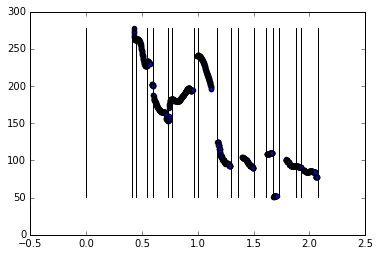

In [206]:
maxp=np.max(pitch)
minp=np.min(pitch)
plt.scatter(time,pitch)
xt=[]
labels=[]
for l in timestamps:
    xt.append(l[1])
    labels.append(l[2])
    plt.plot((l[0],l[0]),(minp,maxp),'k-')


# get rid of unvoiced pitch, then interpolate

we want to have an estimate of which syllables are badly estimated so we may exclude it from 
later exp. First we can get such a measure by simple percentage of count of pitch values within a voiced interval and make a cut-off value. 



In [252]:
#work with CHX000040 again
pitcfile='pitch/pitcCHX000040.tab'
time,adjusted_time,pitch,trim_pitch=trim(pitcfile)



In [256]:

def get_annos(phons_file):
    g=open(phons_file,'r').read().split('\n')
    timestamps=[]
    for line in g:
        l=line.split()
        if line!='':
            timestamps.append(l)
    xt=[]
    labels=[]
    for l in timestamps:
        xt.append(l[1])
        labels.append(l[2])
    return timestamps,xt,labels

In [259]:
print len(time),len(pitch),len(trim_pitch)

826 826 826


In [257]:
phons_file='test/CHX000040.phons'
timestamps,xt,labels=get_annos(phons_file)

In [258]:
timestamps

[['0', '0.3193', 'sil'],
 ['0.3193', '0.3391', 'b'],
 ['0.3391', '0.4808', 'ing4'],
 ['0.4808', '0.5064', 'b'],
 ['0.5064', '0.5803', 'u4'],
 ['0.5803', '0.6791', 'sh'],
 ['0.6791', '0.7783', 'e4'],
 ['0.7783', '0.8654', 'j'],
 ['0.8654', '0.9395', 'i2'],
 ['0.9395', '1.0979', 'q'],
 ['1.0979', '1.1437', 'i2'],
 ['1.1437', '1.2339', 't'],
 ['1.2339', '1.3793', 'a1'],
 ['1.3793', '1.4541', 'g'],
 ['1.4541', '1.6616', 'uan1'],
 ['1.6616', '1.7717', 'x'],
 ['1.7717', '1.8696', 'i4'],
 ['1.8696', '2.137', 'sil']]

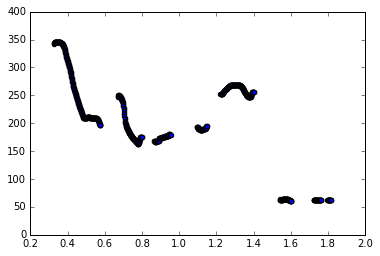

In [261]:
plt.scatter(time,trim_pitch)

In [292]:
#build a dictionary that stores the pitch estimation ratio for each voiced segments label. 

import re
voiced={}
for tsp in timestamps:
    start,end,label=tsp[0],tsp[1],tsp[2]
    
    m = re.search(r'\d+$', label)
    # if the string ends in digits m will be a Match object, or None otherwise.
    if m is not None:
        #print start,end
        #print label
        syl_values=[trim_pitch[i] for i in range(len(trim_pitch)) \
                    if time[i]>=float(start) and time[i] <=float(end)]
        #voiced[label]=syl_values
        interp_time=np.arange(float(start),float(end),0.001)
        pitch_ratio=round(float(len(syl_values))/len(interp_time),3)
        #print len(syl_values),len(interp_time)
        voiced[label]=pitch_ratio
        print start,end,label,pitch_ratio
        

0.3391 0.4808 ing4 0.993
0.5064 0.5803 u4 0.959
0.6791 0.7783 e4 0.99
0.8654 0.9395 i2 0.987
1.0979 1.1437 i2 1.0
1.2339 1.3793 a1 1.0
1.4541 1.6616 uan1 0.303
1.7717 1.8696 i4 0.204


In [290]:
voiced['i4']

0.204

if we make a cut at 0.5, then the last two shouldn't be used, which is intuitive.but of course, this is just one option, where we like to have this information. for time-series mining using long time-series we still need more data that are interpolated. 

In [ ]:
#output of the function should be trimed and further cutoff pitch values and time values. then,
#we can use interp_time to fill in all values in between. 

#work with CHX000040 again
pitcfile='pitch/pitcCHX000040.tab'
time,adjusted_time,pitch,trim_pitch=trim(pitcfile)

idea: we can store the information about the quality of pitch tracks of each syllable in the .qphons file. There will be an additional col to the .phons file, which indicates "ok" or 'UNU'which stands for unusable. This can indicate the quality of pitch estimation for this syllable is not to be trusted and probably only account for a very small duration (below 50% of this syllable).

better idea: instead of write 'UNU', you can just write the actual ratio value.

that would be a separate task - we will utilize that informatin when we pre-extract syllable length pitch curves. Having that in storage, we can interpolate our time series all we want for visualization.

# write to .qphons file 

In [ ]:
#first read the .phons file
#then read .tab file and derive which segments are problematic
#then write to .qphons file

In [305]:
timestamps=[['0', '0.3193', 'sil'],
 ['0.3193', '0.3391', 'b'],
 ['0.3391', '0.4808', 'ing4'],
 ['0.4808', '0.5064', 'b'],
 ['0.5064', '0.5803', 'u4'],
 ['0.5803', '0.6791', 'sh'],
 ['0.6791', '0.7783', 'e4'],
 ['0.7783', '0.8654', 'j'],
 ['0.8654', '0.9395', 'i2'],
 ['0.9395', '1.0979', 'q'],
 ['1.0979', '1.1437', 'i2'],
 ['1.1437', '1.2339', 't'],
 ['1.2339', '1.3793', 'a1'],
 ['1.3793', '1.4541', 'g'],
 ['1.4541', '1.6616', 'uan1'],
 ['1.6616', '1.7717', 'x'],
 ['1.7717', '1.8696', 'i4'],
 ['1.8696', '2.137', 'sil']]



In [321]:
timestamps=[['0', '0.3193', 'sil'],
 ['0.3193', '0.3391', 'b'],
 ['0.3391', '0.4808', 'ing4'],
 ['0.4808', '0.5064', 'b'],
 ['0.5064', '0.5803', 'u4'],
 ['0.5803', '0.6791', 'sh'],
 ['0.6791', '0.7783', 'e4'],
 ['0.7783', '0.8654', 'j'],
 ['0.8654', '0.9395', 'i2'],
 ['0.9395', '1.0979', 'q'],
 ['1.0979', '1.1437', 'i2'],
 ['1.1437', '1.2339', 't'],
 ['1.2339', '1.3793', 'a1'],
 ['1.3793', '1.4541', 'g'],
 ['1.4541', '1.6616', 'uan1'],
 ['1.6616', '1.7717', 'x'],
 ['1.7717', '1.8696', 'i4'],
 ['1.8696', '2.137', 'sil']]


def write_to_qphons(timestamps,trim_pitch,time):

    qphons=[]
    for tsp in timestamps:
        start,end,label=tsp[0],tsp[1],tsp[2]

        m = re.search(r'\d$', label)
        #print label,m
        # if the string ends in digits m will be a Match object, or None otherwise.
        if m is not None:
            #print start,end
            #print tsp
            syl_values=[trim_pitch[i] for i in range(len(trim_pitch)) \
                        if time[i]>=float(start) and time[i] <=float(end)]
            #voiced[label]=syl_values
            interp_time=np.arange(float(start),float(end),0.001)
            pitch_ratio=round(float(len(syl_values))/len(interp_time),3)
            #print len(syl_values),len(interp_time)
            qphons.append([start,end,label,pitch_ratio])
        else:
            tsp.append('na')
            #print tsp
            qphons.append(tsp)
    return qphons


In [322]:
print write_to_qphons(timestamps,trim_pitch,time)

[['0', '0.3193', 'sil', 'na'], ['0.3193', '0.3391', 'b', 'na'], ['0.3391', '0.4808', 'ing4', 0.993], ['0.4808', '0.5064', 'b', 'na'], ['0.5064', '0.5803', 'u4', 0.959], ['0.5803', '0.6791', 'sh', 'na'], ['0.6791', '0.7783', 'e4', 0.99], ['0.7783', '0.8654', 'j', 'na'], ['0.8654', '0.9395', 'i2', 0.987], ['0.9395', '1.0979', 'q', 'na'], ['1.0979', '1.1437', 'i2', 1.0], ['1.1437', '1.2339', 't', 'na'], ['1.2339', '1.3793', 'a1', 1.0], ['1.3793', '1.4541', 'g', 'na'], ['1.4541', '1.6616', 'uan1', 0.303], ['1.6616', '1.7717', 'x', 'na'], ['1.7717', '1.8696', 'i4', 0.204], ['1.8696', '2.137', 'sil', 'na']]


# getting better alignment of segment labels in spectro plot

In [323]:
len(adjusted_time)

826

In [325]:
from batch_interp import *

In [326]:
interpolate_pitch

<function batch_interp.interpolate_pitch>

In [327]:
begin,end=adjusted_time[0],adjusted_time[-1]
interp_time,interp_pitch=interpolate_pitch(begin,end,time,trim_pitch)

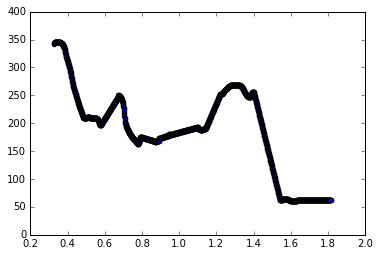

In [328]:
plt.scatter(interp_time,interp_pitch)

In [336]:
b=timestamps[0][0]
e=timestamps[-1][1]
interp_time,interp_pitch=interpolate_pitch(b,e,time,trim_pitch)


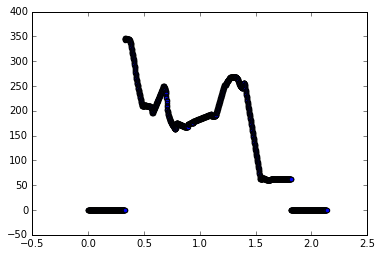

In [337]:
plt.scatter(interp_time,interp_pitch)

In [333]:
interp_time[-30:]

array([ 1.84 ,  1.841,  1.842,  1.843,  1.844,  1.845,  1.846,  1.847,
        1.848,  1.849,  1.85 ,  1.851,  1.852,  1.853,  1.854,  1.855,
        1.856,  1.857,  1.858,  1.859,  1.86 ,  1.861,  1.862,  1.863,
        1.864,  1.865,  1.866,  1.867,  1.868,  1.869])

In [338]:
timestamps[-1]

['1.8696', '2.137', 'sil', 'na']

added trim-plot and interp-plot functions in plot_spectro.py. The former will show uninterpolated trimmed pitch track while the latter shows the entire time (as indicated by .phons file) with interpolated pitch. for visibility, extrapolation is set at 1000, but maybe reset to 0 when showing this to others.

In [339]:
len(my_xticks)

1196

In [340]:
len(input_data[1])

34976

# trim unvoiced segments

In [377]:
def trim_unvoiced(timestamps,adjusted_time,trim_pitch):
    #adjusted_time and trim_pitch must have same length
    "further trim all unvoiced segments in case it picked up pitch values on those"
    trim_unv_pitch=[]
    trim_unv_time=[]
    for k in range(len(timestamps)):
        tsp=timestamps[k]
        start,end,label=tsp[0],tsp[1],tsp[2]

        m = re.search(r'\d$', label)
        #print label,m
        # if the string ends in digits m will be a Match object, or None otherwise.
        if m is not None:
            #print start,end
            #print tsp
            syl_values=[trim_pitch[i] for i in range(len(trim_pitch)) \
                        if adjusted_time[i]>=float(start) and adjusted_time[i] <=float(end)]
            syl_times=[adjusted_time[i] for i in range(len(adjusted_time)) \
                        if adjusted_time[i]>=float(start) and adjusted_time[i] <=float(end)]
            trim_unv_pitch.extend(syl_values[:])
            trim_unv_time.extend(syl_times[:])
    second_adjusted_time=[time for time in adjusted_time if time>=trim_unv_time[0]]

    fp=interp1d(trim_unv_time,trim_unv_pitch,bounds_error=False, fill_value=0)

    return second_adjusted_time,fp(second_adjusted_time)



In [378]:
sat,tun=trim_unvoiced(timestamps,adjusted_time,trim_pitch)

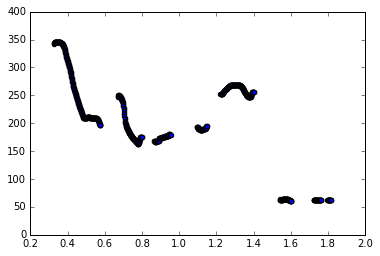

In [362]:
plt.scatter(adjusted_time,trim_pitch)

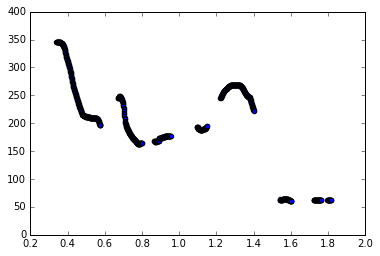

In [379]:
plt.scatter(sat,tun)

In [374]:
second_adjusted_time=[time for time in adjusted_time if time>=adjusted_time[0]]

In [375]:
print adjusted_time[:10],second_adjusted_time[:10],len(adjusted_time),len(second_adjusted_time)

[0.32700000000000007, 0.32800000000000007, 0.32900000000000007, 0.33000000000000007, 0.33100000000000007, 0.3320000000000001, 0.3330000000000001, 0.3340000000000001, 0.3350000000000001, 0.3360000000000001] [0.32700000000000007, 0.32800000000000007, 0.32900000000000007, 0.33000000000000007, 0.33100000000000007, 0.3320000000000001, 0.3330000000000001, 0.3340000000000001, 0.3350000000000001, 0.3360000000000001] 826 826


In [351]:
trim_unv_pitch=[]
trim_unv_time=[]
for k in range(len(timestamps)):
    tsp=timestamps[k]
    start,end,label=tsp[0],tsp[1],tsp[2]

    m = re.search(r'\d$', label)
    #print label,m
    # if the string ends in digits m will be a Match object, or None otherwise.
    if m is not None:
        #print start,end
        #print tsp
        syl_values=[trim_pitch[i] for i in range(len(trim_pitch)) \
                    if adjusted_time[i]>=float(start) and adjusted_time[i] <=float(end)]
        trim_unv_pitch.extend(syl_values[:])
        trim_unv_time.append(adjusted_time[k])
#fp=interp1d(trim_unv_time,trim_unv_pitch,bounds_error=False, fill_value=1000)


In [355]:
len(trim_unv_pitch)

660

In [356]:
len(trim_unv_time)

8

In [352]:
trim_unv_pitch[1]

345.31206589636196

# final interpolation

in do_plot(), we already have the final interpolated pitch tracks: 

<code>    interp_time,interp_pitch=interpolate_pitch(b,e,second_adjusted_time,trim_unv_pitch)
</code>


now what's left is just to do most testing, and extract syllables based on timestamps using this pitch track. 

basically the entire pipeline of trimming, unvoiced trim, and final interpolation, can be summarized in do_plot() in the plot_spectro.py. 

In [4]:
from plot_spectro import *
import sys
from os import listdir


#cmd line arg: give the directory where pitch tab and phons file exist
pitch_tab_file="pitch/pitcCHJ000014.tab"
phons_file="test/CHJ000014.phons"
interp_time,interp_pitch=pitch_proc_chain(pitch_tab_file,phons_file)
    

In [5]:
len(interp_time)

1277

In [6]:
len(interp_pitch)

1277

In [7]:
f='CHJ0000.phons'
first_name=f.split('.phons')[0]

In [8]:
first_name

'CHJ0000'

In [ ]:
pitch_tab_file.split('phons')

In [10]:
type(interp_time[34])

numpy.float64

In [11]:
interp_pitch[100:200]

array([ 1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.])

In [12]:
test_pitch=[i for i in interp_pitch if i!=1000]

In [13]:
len(test_pitch)

616

In [14]:
test_pitch

[147.46577420860655,
 147.25780945440641,
 147.06755910810188,
 146.89265756199674,
 146.7312283731805,
 146.58190180446874,
 146.4433167384623,
 146.31431491671174,
 146.19391429944278,
 146.08121664314476,
 145.97544848029213,
 145.87595129665158,
 145.78214757660686,
 145.69352198561737,
 145.60961235437992,
 145.53000989765897,
 145.45430386628354,
 145.38224470771695,
 145.3135024923734,
 145.2478171659213,
 145.18491963780974,
 145.12454407539749,
 145.06639794316433,
 145.01016648148902,
 144.95550785003283,
 144.90197368055934,
 144.84913713091012,
 144.79652090014932,
 144.74358960387522,
 144.6896918786392,
 144.63405995237059,
 144.5758766432343,
 144.51399078961782,
 144.44755462056489,
 144.37622417106812,
 144.30022627123722,
 144.22018269220575,
 144.1370321440838,
 144.05225213411927,
 143.98784453742888,
 143.92343694073847,
 143.85902934404808,
 143.79462174735767,
 143.73021415066728,
 143.66580655397686,
 143.60139895728648,
 143.53699136059606,
 143.47258376390567,

In [15]:
import cPickle
cPickle.dump(test_pitch, open('save.p', 'wb')) 


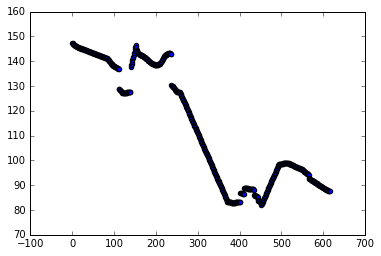

In [20]:
%matplotlib inline
plt.scatter([i for i in range(len(test_pitch))],test_pitch)

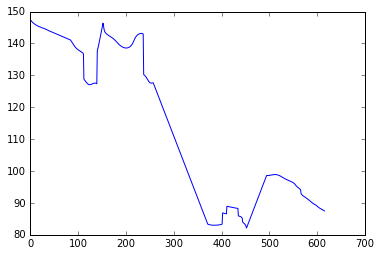

In [22]:
plt.plot(test_pitch)

# extract syllable sized pitch contours write to file

In [26]:
dir_phons='pitch'
phons_file='CHJ000019.phons'
timestamps,xt,labels=get_annos(dir_phons+'/'+phons_file)

In [28]:
print timestamps

[['0', '0.4148', 'sil'], ['0.4148', '0.4425', 'b'], ['0.4425', '0.5498', 'u4'], ['0.5498', '0.6008', 'j'], ['0.6008', '0.7331', 'in3'], ['0.7331', '0.7657', 'z'], ['0.7657', '0.9625', 'ai4'], ['0.9625', '1.0058', 'd'], ['1.0058', '1.1715', 'ao4'], ['1.1715', '1.3010', 'i4'], ['1.3010', '1.3630', 'sh'], ['1.3630', '1.5025', 'ang4'], ['1.5025', '1.6125', 'sh'], ['1.6125', '1.6770', 'iii1'], ['1.6770', '1.7258', 'b'], ['1.7258', '1.8771', 'ai4'], ['1.8771', '1.9286', 'l'], ['1.9286', '2.0744', 'e0'], ['2.0744', '2.186', 'sil']]


In [57]:
#read pitch tab file
def read_pitch(procd_tab):
    #procd_tab='procd_pitch/CHJ000014_proc.tab'
    f=open(procd_tab,'r').read().split('\n')
    time=[]
    pitch=[]
    for line in f[1:]:
        if line!='':
            time.append(line.split('\t')[0])
            pitch.append(line.split('\t')[1])
            
            #the pitch vector contains pitch values (track) of one contour of the sentence
    return time,pitch

In [85]:
def extract_syl(timestamps,time,pitch):
    """input is timestamps and pitch contour of a sentence;output is a list of syl-length pitch vectors extracted 
    from this sentence. later we write these vectors into a file, each row is one syl-length vector of pitch"""
    pitch_vec=[]
    
    for k in range(len(timestamps)):
        tsp=timestamps[k]
        start,end,label=tsp[0],tsp[1],tsp[2]
        #print start,end,label
        m = re.search(r'\d$', label)
        #print label,m
        # if the string ends in digits m will be a Match object, or None otherwise.
        if m is not None:
            #print start,end
            #print tsp
            syl_values=[str(round(float(pitch[i]),3)) for i in range(len(pitch)) \
                        if float(time[i])>=float(start) and float(time[i]) <=float(end) and float(pitch[i])!=1000]

            #append tone label
            syl_values.append(label[-1])
            pitch_vec.append(syl_values)
            #trim_unv_time.extend(syl_times[:])
    

    return pitch_vec



In [55]:
pv=extract_syl(timestamps,time,pitch)

In [58]:
#append to file
def append_syl(pv,outname):
    f=open(outname,'a')
    for row in pv:
        line=','.join(row)
        f.write(line+'\n')
    f.close()

In [388]:
#for all sentences;get pv; append lines to the output file
path='procd_pitch'
#dir='pitch_prob'
onlyfiles = [ f for f in listdir(path) if f.endswith(".tab")]
#print onlyfiles
for file_pitch in onlyfiles:
    inputfile=path+'/'+file_pitch
    print inputfile
    first_name=file_pitch.split('.tab')[0]
    phons_file='pitch/'+first_name.split('_')[0]+'.phons'
    
    time,pitch=read_pitch(inputfile)
    timestamps,xt,labels=get_annos(phons_file)
    pv=extract_syl(timestamps,time,pitch)
    

procd_pitch/CHJ000014_proc.tab
procd_pitch/CHJ000018_proc.tab
procd_pitch/CHJ000019_proc.tab
procd_pitch/CHJ000025_proc.tab
procd_pitch/CHJ000032_proc.tab
procd_pitch/CHJ000037_proc.tab
procd_pitch/CHJ000040_proc.tab
procd_pitch/CHJ000046_proc.tab
procd_pitch/CHJ000051_proc.tab
procd_pitch/CHJ000061_proc.tab
procd_pitch/CHJ000064_proc.tab
procd_pitch/CHJ000067_proc.tab
procd_pitch/CHJ000071_proc.tab
procd_pitch/CHJ000083_proc.tab
procd_pitch/CHJ000088_proc.tab
procd_pitch/CHJ000090_proc.tab
procd_pitch/CHJ000096_proc.tab
procd_pitch/CHJ000101_proc.tab
procd_pitch/CHJ000102_proc.tab
procd_pitch/CHJ000103_proc.tab
procd_pitch/CHJ000106_proc.tab
procd_pitch/CHJ000108_proc.tab
procd_pitch/CHJ000110_proc.tab
procd_pitch/CHJ000115_proc.tab
procd_pitch/CHJ000119_proc.tab
procd_pitch/CHJ000120_proc.tab
procd_pitch/CHJ000131_proc.tab
procd_pitch/CHJ000132_proc.tab
procd_pitch/CHJ000133_proc.tab
procd_pitch/CHJ000134_proc.tab
procd_pitch/CHJ000139_proc.tab
procd_pitch/CHJ000145_proc.tab
procd_pi

In [389]:
len(pv)

8

In [387]:
pwd

u'/Users/zangsir/Desktop/speech-exp-diuss'

In [86]:
procd_tab='procd_pitch/CHJ000019_proc.tab'
time,pitch=read_pitch(procd_tab)
pv=extract_syl(timestamps,time,pitch)
append_syl(pv,'testout.csv')

In [93]:
from saxpy import SAX
word,alpha=12,4
s=SAX(word,alpha,)

for p in pv:
    ts=p[:-1]
    ts=[float(i) for i in ts]
    (x1String, x1Indices) = s.to_letter_rep(ts)
    print x1String

dddddcbbaaaa
dddccbbbbbaa
aaaaabccdddd
ddddcccbbaaa
dddcbbbbaaaa
cdddddcbaaaa
aaabccdddddc
ddddccbbaaaa
ddccbccccbba


# downsample - using scipy.resample

In [165]:
#import numpy as np
a = np.array([1.,2,6,2,1,7])
R = 3
#a.reshape(-1, R)
#=> array([[ 1.,  2.,  6.],
 #        [ 2.,  1.,  7.]])

#a.reshape(-1, R).mean(axis=1)
#=> array([ 3.        ,  3.33333333])
#In the general case, you can pad your array with NaNs to a size divisible by R, 
#and take the mean using scipy.nanmean.

import math, scipy
b = np.append(a, [ 4 ])
b.shape
#=> (7,)
pad_size = math.ceil(float(b.size)/R)*R - b.size
b_padded = np.append(b, np.zeros(pad_size)*np.NaN)
b_padded.shape
#=> (9,)
scipy.nanmean(b_padded.reshape(-1,R), axis=1)
#=> array([ 3.        ,  3.33333333,  4.])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([ 3.        ,  3.33333333,  4.        ])

In [167]:
math.ceil(float(b.size)/R)

3.0

In [164]:
b

array([ 1.,  2.,  6.,  2.,  1.,  7.,  4.])

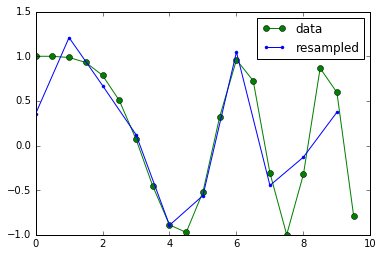

In [109]:
#this is not what we want - our signal is not periodic
>>> from scipy import signal
>>>
>>> x = np.linspace(0, 10, 20, endpoint=False)
>>> xg = np.linspace(0,10,10,endpoint=False)
>>> y = np.cos(-x**2/6.0)
>>> f = signal.resample(y, 10)
>>> g = signal.decimate(y,2)
>>> xnew = np.linspace(0, 10, 10, endpoint=False)
>>>
>>> import matplotlib.pyplot as plt
>>> plt.plot(x, y, 'go-', xnew, f, '.-')

>>> plt.legend(['data', 'resampled'], loc='best')
>>> plt.show()

107
133
197
166
130
140
65
152
140


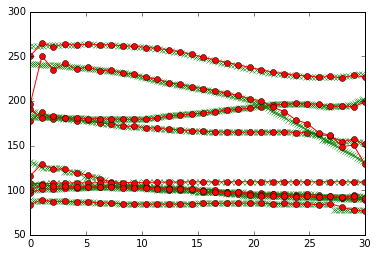

In [129]:
#downsample using scipy resample
for p in pv:
    ts=p[:-1]
    #print len(ts)
    x = np.linspace(0,30, len(ts), endpoint=False)
    xr = np.linspace(0,30,30)
    plt.plot(x,ts,'gx')
    y = signal.resample(ts, 30)
    plt.plot(xr,y,'ro-')

    
    
    

In [224]:
def plot_matrix_resample(pv,num_per_row):    
    #num_per_row=2
    #num_file=len(onlyfiles)
    
    num_file=len(pv)
    num_plot=num_file

    #plot num_per_row per row
    while num_plot%num_per_row!=0:
        num_plot+=1
    #plot a by b matrix
    b=num_per_row
    a=num_plot/b


    f, axarr = plt.subplots(a,b)
    i=j=0
    for p in pv:
        #print i,j
        ts=p[:-1]
        x = np.linspace(0,30, len(ts))
        xr = np.linspace(0,30,30)
        #plt.plot(x,ts,'gx')
    
        z=signal.resample(ts,30)
        #plt.plot(xr,z,'ro-')
    
        axarr[i, j].plot(x, ts, 'bx', xr, z, 'ro')
        if j==b-1:
            i+=1
            j=0
        else:
            j+=1

    #f.savefig(plot_dir+'/'+outname)
    #print 'saved pitch plots ' + outname

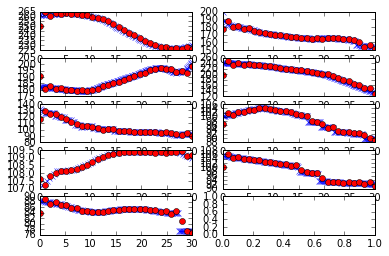

In [225]:
plot_matrix_resample(pv,2)

In [226]:
for i in pv:
    print i[-1]

4
3
4
4
4
4
1
4
0


In [227]:
pv[-1]

['88.469',
 '88.393',
 '88.317',
 '88.242',
 '88.166',
 '88.09',
 '88.014',
 '87.939',
 '87.863',
 '87.787',
 '87.712',
 '87.636',
 '87.56',
 '87.485',
 '87.409',
 '87.333',
 '87.257',
 '87.182',
 '87.106',
 '87.03',
 '86.933',
 '86.824',
 '86.704',
 '86.575',
 '86.442',
 '86.313',
 '86.19',
 '86.073',
 '85.96',
 '85.849',
 '85.738',
 '85.626',
 '85.513',
 '85.4',
 '85.289',
 '85.184',
 '85.085',
 '84.994',
 '84.911',
 '84.834',
 '84.763',
 '84.697',
 '84.636',
 '84.58',
 '84.528',
 '84.483',
 '84.443',
 '84.409',
 '84.381',
 '84.36',
 '84.346',
 '84.339',
 '84.338',
 '84.343',
 '84.355',
 '84.374',
 '84.4',
 '84.432',
 '84.471',
 '84.515',
 '84.565',
 '84.618',
 '84.674',
 '84.731',
 '84.788',
 '84.844',
 '84.898',
 '84.951',
 '85.003',
 '85.052',
 '85.1',
 '85.145',
 '85.187',
 '85.227',
 '85.264',
 '85.299',
 '85.33',
 '85.358',
 '85.383',
 '85.404',
 '85.423',
 '85.438',
 '85.449',
 '85.457',
 '85.461',
 '85.462',
 '85.458',
 '85.451',
 '85.441',
 '85.426',
 '85.408',
 '85.387',
 '

# downsample using averaging


In [242]:
import math, scipy
#b = np.append(a, [ 4 ])
#b.shape
#=> (7,)
def downsample_averaging(ts):
    tsf=[float(i) for i in ts]
    R=math.floor(len(ts)/30.0)
    b=np.array(tsf)
    #print R
    #print len(ts)/R
    pad_size = math.ceil(float(b.size)/R)*R - b.size
    b_padded = np.append(b, np.zeros(pad_size)*np.NaN)
    #print b_padded.shape
    #=> (9,)
    result=scipy.nanmean(b_padded.reshape(-1,R), axis=1)
    return result[:30]



In [243]:
#demo
res=downsample_averaging(ts)
print len(res)

30


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


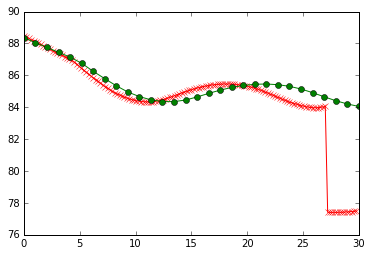

In [143]:
#examine one ts
plt.plot(x,ts,'rx-',xr,result,'go-')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


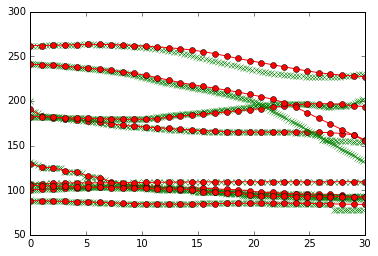

In [245]:
#examine all ts in one plot
for p in pv:
    ts=p[:-1]
    #print len(ts)
    x = np.linspace(0,30, len(ts), endpoint=False)
    xr = np.linspace(0,30,30)
    plt.plot(x,ts,'gx')
    
    z=downsample_averaging(ts)
    #print len(z)
    plt.plot(xr,z,'ro-')
    
    
    

In [361]:
#examing all ts, each one plot
def plot_matrix_average(pv,num_per_row):    
    #num_per_row=2
    #num_file=len(onlyfiles)
    
    num_file=len(pv)
    num_plot=num_file

    #plot num_per_row per row
    while num_plot%num_per_row!=0:
        num_plot+=1
    #plot a by b matrix
    b=num_per_row
    a=num_plot/b


    f, axarr = plt.subplots(a,b)
    i=j=0
    for p in pv:
        #print i,j
        ts=p[:-1]
        x = np.linspace(0,30, len(ts), endpoint=False)
        xr = np.linspace(0,30,30)
        #plt.plot(x,ts,'gx')
    
        z=downsample_averaging(ts)
        #plt.plot(xr,z,'ro-')
    
        axarr[i, j].plot(x, ts, 'bx', xr, z, 'ro')
        plt.suptitle('downsample averaging')

        if j==b-1:
            i+=1
            j=0
        else:
            j+=1

    #f.savefig(plot_dir+'/'+outname)
    #print 'saved pitch plots ' + outname

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


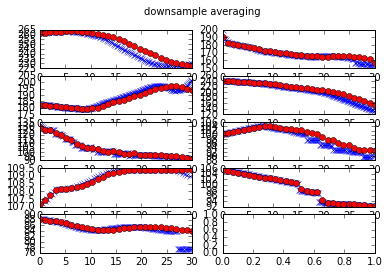

In [362]:
plot_matrix_average(pv,2)

# downsample using equidistant sampling

In [312]:
#use mixed steps: if a=floor(orig_len/comp_len),b=ceil(orig_len/comp_len), 
#we want to use steps x a's and y b's . we need the x and y. then x+y =30, 
#we want to maximize f=a*x+b*y, with the constraint f<=orig_len (this we are actually leaving 
#out a few points in the end, but the least amount of points)
#given a*x+b*(30-x)<=orig_len, we have 30*b + (a-b)x <= orig_len, then the orig_len maximize f.
#but not always possible because x and y must be integers, so is a and b.
#so x<=(orig_len-30b)/(a-b)
#for example, if a,b=5,4, orig_len=130, then x<=(130-120)=10, y=20. So, the total length 
#is approximated by a*x+b*y=5*10+4*20=130. perfectly. Not always like this though. say 
#orig_len=143, then x=(143-120)=23, so approx is 
print 5*23+4*7 #143, perfect again!
# how about we make it 145: x=25, approx:
print 5*25 + 4*5 #perfect!


143
145


In [399]:
#want 30 point vec

#testing madeup vec:
#orig_len=143
#comp_len=30
#vec=[i for i in range(orig_len)]
#step=int(math.floor(len(vec)/comp_len))

#step=orig_len/comp_len + 1

#step=[math.floor((len(vec)/comp_len)),math.ceil((len(vec)/comp_len))]
#pad_len=orig_len+pad(orig_len,comp_len)
def downsample_mix(vec,comp_len):
    orig_len=len(vec)
    a,b=int(math.floor(len(vec)/float(comp_len))),int(math.ceil(len(vec)/float(comp_len)))
    x=(orig_len-30*b)/(a-b)
    y=30-x
    #print a,b
    #print x,y
    new_vec=[]
    #start sampling from 2nd element, not 0th
    i=b/2
    #stop=(step-1)*comp_len
    #print stop
    #pointer should advance k times
    #ex: a=5,b=4,x=20,y=30
    for k in range(x):
        #repeat this operation k times, each time advance i by a
        new_vec.append(vec[i])
        i+=a

    for k in range(y):
        new_vec.append(vec[i])
        i+=b

    #print len(new_vec)
    return new_vec

In [ ]:
dsm=downsample_mix(ts,30)
x = np.linspace(0,30, len(ts), endpoint=False)
xr = np.linspace(0,30,30)
print len(dsm)
print len(x),len(xr)

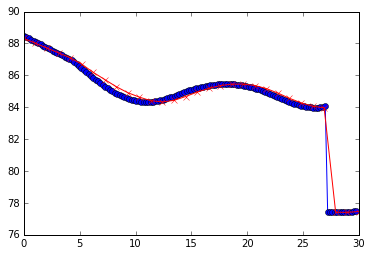

In [338]:
plt.plot(x,ts,'bo-')
plt.plot(xr,dsm,'rx-')

In [413]:
def plot_matrix_mix(pv,num_per_row):    
    #num_per_row=2
    #num_file=len(onlyfiles)
    
    num_file=len(pv)
    num_plot=num_file

    #plot num_per_row per row
    while num_plot%num_per_row!=0:
        num_plot+=1
    #plot a by b matrix
    b=num_per_row
    a=num_plot/b


    f, axarr = plt.subplots(a,b)
    i=j=0
    
    for p in pv:
        #print i,j
        ts=p[:-1]
        x = np.linspace(0,30, len(ts), endpoint=False)
        xr = np.linspace(0,30,30)
        #plt.plot(x,ts,'gx')
    
        #z=downsample_averaging(ts)
        z=downsample_mix(ts,30)

        #plt.plot(xr,z,'ro-')
    
        axarr[i, j].plot(x, ts, 'bx',label='orig')
        axarr[i,j].plot(xr, z, 'ro',label='down')
        #f.set_title("mixed")
        plt.suptitle('downsample mixed')
        
        plt.legend()
        if j==b-1:
            i+=1
            j=0
        else:
            j+=1


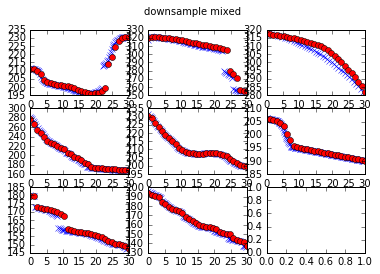

In [414]:
plot_matrix_mix(pv,3)


In [380]:
path='syl_csv'
#path='./'
#dir='pitch_prob'
onlyfiles = [ f for f in listdir(path) if f.endswith(".csv")]
#print onlyfiles
pv=[]
for file_pitch in onlyfiles:
    inputfile=path+'/'+file_pitch
    f=open(inputfile,'r').read().split('\n')
    for syl in f:
        if syl!='':
            pv.append(syl.split(','))



In [381]:
len(pv)

3464

In [367]:
f[0].split(',')

['211.573',
 '211.419',
 '211.261',
 '211.097',
 '210.925',
 '210.739',
 '210.533',
 '210.297',
 '210.014',
 '209.649',
 '209.113',
 '208.089',
 '205.939',
 '204.815',
 '204.173',
 '203.707',
 '203.338',
 '203.03',
 '202.766',
 '202.536',
 '202.332',
 '202.149',
 '201.983',
 '201.83',
 '201.688',
 '201.556',
 '201.43',
 '201.309',
 '201.192',
 '201.078',
 '200.965',
 '200.853',
 '200.74',
 '200.626',
 '200.51',
 '200.392',
 '200.269',
 '200.142',
 '200.011',
 '199.873',
 '199.728',
 '199.576',
 '199.415',
 '199.244',
 '199.064',
 '198.874',
 '198.673',
 '198.463',
 '198.245',
 '198.022',
 '197.798',
 '197.575',
 '197.359',
 '197.154',
 '196.963',
 '196.789',
 '196.633',
 '196.497',
 '196.38',
 '196.281',
 '196.199',
 '196.136',
 '196.088',
 '196.057',
 '196.043',
 '196.046',
 '196.067',
 '196.107',
 '196.168',
 '196.253',
 '196.364',
 '196.505',
 '196.681',
 '196.894',
 '197.149',
 '197.446',
 '197.789',
 '198.177',
 '198.615',
 '199.115',
 '212.674',
 '213.16',
 '213.684',
 '214.264',

In [383]:
import random

foo = ['a', 'b', 'c', 'd', 'e']
print(random.sample(foo,3))

['a', 'c', 'e']
